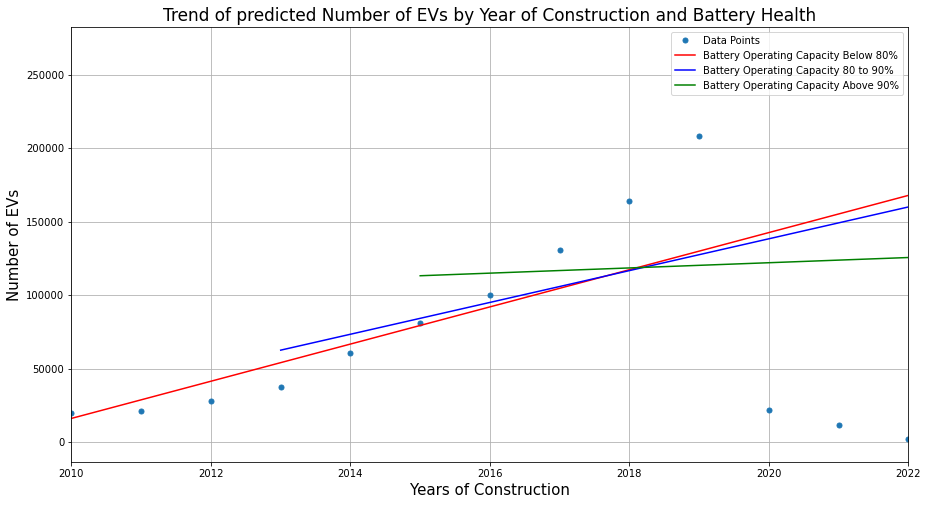

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# # Manually replace the file path
csv_url = 'C:/Users/samar/Downloads/dft_test_result_2022/test_result.csv'
df = pd.read_csv(csv_url, delimiter = '|', error_bad_lines=False)
df = df[df['fuel_type'].isin(['EL', 'Electric', 'HY' , 'Hybrid Electric (Clean)'])]

# # Manually change the file path
# file_path = r'C:\Users\varun\OneDrive - Maynooth University\0_BCP\New Files\test vehicle.csv'
# df = pd.read_csv(file_path)

# Calculating age
df['present'] = df['test_date'].str[-4:]
df['present'] = pd.to_numeric(df['present'], errors='coerce')
df['start'] = df['first_use_date'].str[-4:]
df['start'] = pd.to_numeric(df['start'], errors='coerce')
df['age'] = df['present'] - df['start']

# Define functions to categorize battery health
def assign_value_boh(x):
    if x > 8:
        return 'Above 90%'
    elif 5 <= x <= 8:
        return '80-90%'
    else:
        return 'Below 80%'

df['boh'] = df['age'].apply(assign_value_boh)

# Calculate the counts of each year of construction
year_counts = df['start'].value_counts().reset_index()
year_counts.columns = ['start', 'Count']
year_counts = year_counts.sort_values(by='start', ascending=True)

# Filter data for the years between 2015 and 2020
df_2015_to_2020 = df[(df['start'] >= 2015) & (df['start'] <= 2020)]
df_2013_to_2020 = df[(df['start'] >= 2013) & (df['start'] <= 2020)]
df_2010_to_2020 = df[(df['start'] >= 2010) & (df['start'] <= 2020)]
year_counts_2015_to_2020 = df_2015_to_2020['start'].value_counts().reset_index()
year_counts_2013_to_2020 = df_2013_to_2020['start'].value_counts().reset_index()
year_counts_2010_to_2020 = df_2010_to_2020['start'].value_counts().reset_index()

# Plot the line plot
plt.figure(figsize=(15, 8))
plt.plot(year_counts['start'], year_counts['Count'], 'o', label='Data Points', markersize=5)

# Fit a linear regression to calculate the trend line for the years between 2015 and 2020
coefficients_2015_to_2020 = np.polyfit(year_counts_2015_to_2020['index'], year_counts_2015_to_2020['start'], 1)
trend_line_2015_to_2020 = np.poly1d(coefficients_2015_to_2020)

# Fit a linear regression to calculate the trend line for the years between 2013 and 2020
coefficients_2013_to_2020 = np.polyfit(year_counts_2013_to_2020['index'], year_counts_2013_to_2020['start'], 1)
trend_line_2013_to_2020 = np.poly1d(coefficients_2013_to_2020)

# Fit a linear regression to calculate the trend line for the years between 2010 and 2020
coefficients_2010_to_2020 = np.polyfit(year_counts_2010_to_2020['index'], year_counts_2010_to_2020['start'], 1)
trend_line_2010_to_2020 = np.poly1d(coefficients_2010_to_2020)

# Calculate the trend values for the years 2010 to 2030
x_2010_to_2030 = np.arange(2010, 2031)
extended_trend_2010_to_2030 = trend_line_2010_to_2020(x_2010_to_2030)

# Calculate the trend values for the years 2013 to 2030
x_2013_to_2030 = np.arange(2013, 2031)
extended_trend_2013_to_2030 = trend_line_2013_to_2020(x_2013_to_2030)

# Calculate the trend values for the years 2015 to 2030
x_2015_to_2030 = np.arange(2015, 2031)
extended_trend_2015_to_2030 = trend_line_2015_to_2020(x_2015_to_2030)

# Plot the extended trend lines
plt.plot(x_2010_to_2030, extended_trend_2010_to_2030, color='red', label='Battery Operating Capacity Below 80%')
plt.plot(x_2013_to_2030, extended_trend_2013_to_2030, color='blue', label='Battery Operating Capacity 80 to 90%')
plt.plot(x_2015_to_2030, extended_trend_2015_to_2030, color='green', label='Battery Operating Capacity Above 90%')

# Set the x-axis limit to show data until the year 2030
plt.xlim(2010, 2022)

plt.xlabel('Years of Construction',fontsize = 15)
plt.ylabel('Number of EVs',fontsize = 15)
plt.title('Trend of predicted Number of EVs by Year of Construction and Battery Health',fontsize = 17)
plt.legend()
plt.grid(True)
plt.show()
